In [1]:
from keras.applications.vgg16 import VGG16, decode_predictions

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG16()

553467904/553467096 [==============================] - 64s 0us/step


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
import numpy as np

In [6]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [9]:
X_train0.shape

(60000, 28, 28)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.optimizers import RMSprop
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
# model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())


In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.8994 - acc: 0.7761 - val_loss: 0.4002 - val_acc: 0.8896
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3523 - acc: 0.8976 - val_loss: 0.2943 - val_acc: 0.9156
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2896 - acc: 0.9159 - val_loss: 0.2554 - val_acc: 0.9253
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2567 - acc: 0.9253 - val_loss: 0.2235 - val_acc: 0.9348
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2295 - acc: 0.9337 - val_loss: 0.2032 - val_acc: 0.9411
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2064 - acc: 0.9404 - val_loss: 0.1846 - val_acc: 0.9471
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1853 - acc: 0.9467 - val_loss: 0.1670 - val_acc

In [16]:
model1.save("mnist_cnn11.hdf5")

In [17]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

In [19]:
from custom_ml import *

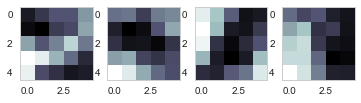

In [20]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [23]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [24]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.7469 - acc: 0.7588 - val_loss: 0.2670 - val_acc: 0.9219
Epoch 2/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.2093 - acc: 0.9384 - val_loss: 0.1529 - val_acc: 0.9568
Epoch 3/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1486 - acc: 0.9560 - val_loss: 0.1172 - val_acc: 0.9657
Epoch 4/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1242 - acc: 0.9635 - val_loss: 0.1022 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.1095 - acc: 0.9664 - val_loss: 0.1009 - val_acc: 0.9717
Epoch 6/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.1009 - acc: 0.9701 - val_loss: 0.0849 - val_acc: 0.9746
Epoch 7/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0940 - acc: 0.9719 - val_loss: 0.

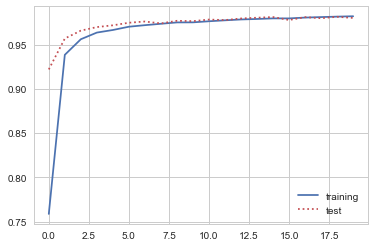

In [25]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [189]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [190]:
X = olivetti.data
y = olivetti.target

In [191]:
X.shape

(400, 4096)

In [192]:
X = X.reshape(400,64,64,1)

In [193]:
X.shape

(400, 64, 64, 1)

In [194]:
y.shape

(400,)

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [196]:
Y_train.shape, Y_test.shape

((280,), (120,))

In [197]:
Y_train = Y_train.reshape(280,1)
Y_test = Y_test.reshape(120,1)

In [198]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_train.dtype)

(280, 64, 64, 1) float32


In [199]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train, 40)
Y_test = np_utils.to_categorical(Y_test, 40)

In [200]:
Y_train.shape

(280, 40)

In [224]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(32, (10, 10), activation='relu', input_shape=(64, 64, 1), kernel_initializer="glorot_uniform"))
model1.add(Conv2D(32, (10, 10), activation='relu', kernel_regularizer=l2(0.001)))
model1.add(MaxPooling2D())


model1.add(Flatten())
model1.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [226]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=40,  validation_data=(X_test, Y_test), verbose=1)

Train on 280 samples, validate on 120 samples
Epoch 1/40
280/280 [==============================] - 6s 21ms/step - loss: 3.5566 - acc: 0.1536 - val_loss: 3.6358 - val_acc: 0.0583
Epoch 2/40
280/280 [==============================] - 6s 22ms/step - loss: 3.4728 - acc: 0.1464 - val_loss: 3.6853 - val_acc: 0.0583
Epoch 3/40
280/280 [==============================] - 6s 22ms/step - loss: 2.8779 - acc: 0.2929 - val_loss: 2.4578 - val_acc: 0.3750
Epoch 4/40
280/280 [==============================] - 6s 22ms/step - loss: 1.8882 - acc: 0.5321 - val_loss: 2.5088 - val_acc: 0.3500
Epoch 5/40
280/280 [==============================] - 6s 22ms/step - loss: 1.1157 - acc: 0.6964 - val_loss: 1.9663 - val_acc: 0.4167
Epoch 6/40
280/280 [==============================] - 6s 22ms/step - loss: 0.7371 - acc: 0.8250 - val_loss: 1.1354 - val_acc: 0.7083
Epoch 7/40
280/280 [==============================] - 6s 22ms/step - loss: 0.2868 - acc: 0.9464 - val_loss: 0.8706 - val_acc: 0.7667
Epoch 8/40
280/280 [===

KeyboardInterrupt: 

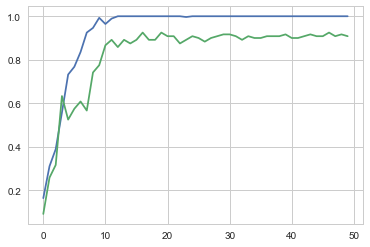

In [205]:
plt.plot(hist1.history["acc"])
plt.plot(hist1.history["val_acc"])
plt.show()

In [276]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(30, (4, 4), activation='relu', input_shape=(64,64,1), kernel_initializer="glorot_uniform", padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(40, (4, 4), activation='relu', padding='same', kernel_initializer="glorot_uniform", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(50, (4, 4), activation='relu', padding='same', kernel_initializer="glorot_uniform", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [277]:
%%time
hist = model.fit(X_train, Y_train, epochs=50,batch_size = 20, validation_data=(X_test, Y_test), verbose=2)

Train on 280 samples, validate on 120 samples
Epoch 1/50
 - 3s - loss: 3.7934 - acc: 0.0214 - val_loss: 3.7712 - val_acc: 0.0167
Epoch 2/50
 - 1s - loss: 3.7622 - acc: 0.0286 - val_loss: 3.7807 - val_acc: 0.0083
Epoch 3/50
 - 1s - loss: 3.7577 - acc: 0.0357 - val_loss: 3.8142 - val_acc: 0.0000e+00
Epoch 4/50
 - 1s - loss: 3.7506 - acc: 0.0321 - val_loss: 3.7728 - val_acc: 0.0083
Epoch 5/50
 - 2s - loss: 3.7373 - acc: 0.0500 - val_loss: 3.7896 - val_acc: 0.0000e+00
Epoch 6/50
 - 2s - loss: 3.7237 - acc: 0.0357 - val_loss: 3.7976 - val_acc: 0.0083
Epoch 7/50
 - 2s - loss: 3.6978 - acc: 0.0536 - val_loss: 3.7582 - val_acc: 0.0083
Epoch 8/50
 - 2s - loss: 3.6588 - acc: 0.1000 - val_loss: 3.6968 - val_acc: 0.0417
Epoch 9/50
 - 2s - loss: 3.6130 - acc: 0.1357 - val_loss: 3.6227 - val_acc: 0.0833
Epoch 10/50
 - 2s - loss: 3.1070 - acc: 0.2750 - val_loss: 2.7290 - val_acc: 0.2750
Epoch 11/50
 - 2s - loss: 2.5748 - acc: 0.3571 - val_loss: 2.7170 - val_acc: 0.2417
Epoch 12/50
 - 2s - loss: 2.104

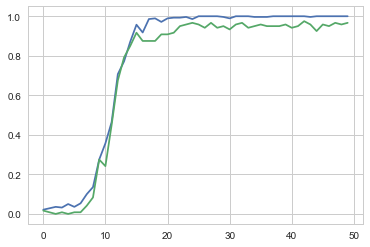

In [278]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.show()

In [279]:
model.evaluate(X_test, Y_test,verbose=2)

[0.22533311446507773, 0.9666666706403096]

In [251]:
from PIL import *

In [255]:
from PIL import Image
 
im = np.array(Image.open('tmp.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

D:\anaconda\lib\site-packages\PIL\Image.py:85: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL
  "The _imaging extension was built for Python with UCS2 support; "


ImportError: The _imaging extension was built for another version of Pillow or PIL

In [246]:
model = VGG16()